# Random Forest Classification for car safety prediction


Random Forest is a supervised machine learning algorithm based on ensemble learning. In this project, I built two Random Forest Classifier models to predict car safety—one with 10 decision trees and another with 100 decision trees. The accuracy of the model improves as the number of decision trees increases. I demonstrated the feature selection process using the Random Forest model to identify important features, rebuilt the model using only those features, and evaluated its impact on accuracy. The project utilized the Car Evaluation Data Set from the UCI Machine Learning Repository to perform predictions and analysis

##  The problem statement


The problem is to predict the safety of the car. In this project, I build a Decision Tree Classifier to predict the safety of the car. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the **Car Evaluation Data Set** for this project, downloaded from the UCI Machine Learning Repository website.


## Dataset description


I have used the **Car Evaluation Data Set** downloaded from the Kaggle website. I have downloaded this data set from the Kaggle website. The data set can be found at the following url:-


http://archive.ics.uci.edu/ml/datasets/Car+Evaluation


Car Evaluation Database was derived from a simple hierarchical decision model originally developed for expert system for decision making. The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety. 

It was donated by Marko Bohanec.

##  Import libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
import warnings

warnings.filterwarnings('ignore')

##  Import dataset

In [80]:
data = 'car+evaluation/car.data'

df = pd.read_csv(data, header=None)

## Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [81]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [82]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [83]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [84]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [86]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [87]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

The `class` target variable is ordinal in nature.

Class Distribution (%):
 class
unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: proportion, dtype: float64


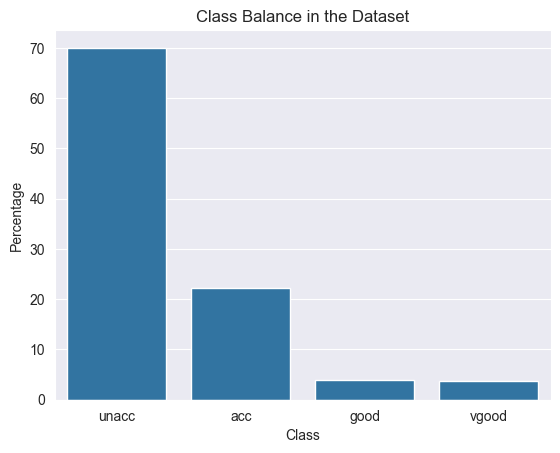

In [88]:
# Analyze class balance
class_distribution = df['class'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)

# Visualize class balance
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Balance in the Dataset')
plt.show()


### Missing values in variables

In [89]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

##  Declare feature vector and target variable

In [90]:
X = df.drop(['class'], axis=1)

y = df['class']

## Split data into separate training and test set

In [91]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [92]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1382, 6), (346, 6))

##  Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [93]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables


In [94]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


We can see that all  the variables are ordinal categorical data type.

In [95]:
# import category encoders

import category_encoders as ce

In [96]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [97]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [98]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


We now have training and test set ready for model building. 

##  Random Forest Classifier model with default parameters with cross validation

In [99]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Instantiate the Random Forest classifier
rfc = RandomForestClassifier(random_state=0)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation results
print('Cross-validation accuracy scores: ', cv_scores)
print('Mean cross-validation accuracy: {0:0.4f}'.format(cv_scores.mean()))

# Fit the model on the entire training set
rfc.fit(X_train, y_train)

# Predict the test set results
y_pred = rfc.predict(X_test)

# Check accuracy score on the test set
print('Test set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Cross-validation accuracy scores:  [0.97122302 0.97841727 1.         0.93478261 0.97101449 0.96376812
 0.97101449 0.94927536 0.97826087 0.94927536]
Mean cross-validation accuracy: 0.9667
Test set accuracy score: 0.9624


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

##  Random Forest Classifier model with parameter n_estimators=100 with cross validation


In [100]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Instantiate the Random Forest classifier with 100 estimators
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rfc_100, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation results
print('Cross-validation accuracy scores: ', cv_scores)
print('Mean cross-validation accuracy: {0:0.4f}'.format(cv_scores.mean()))

# Fit the model on the entire training set
rfc_100.fit(X_train, y_train)

# Predict the test set results
y_pred = rfc_100.predict(X_test)

# Check accuracy score on the test set
print('Test set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Cross-validation accuracy scores:  [0.97122302 0.97841727 1.         0.93478261 0.97101449 0.96376812
 0.97101449 0.94927536 0.97826087 0.94927536]
Mean cross-validation accuracy: 0.9667
Test set accuracy score: 0.9624


##  Find important features with Random Forest model


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 


First, I will create the Random Forest model as follows:-

In [101]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [102]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.284409
persons     0.232452
buying      0.171266
maint       0.152731
lug_boot    0.093004
doors       0.066137
dtype: float64

We can see that the most important feature is `safety` and least important feature is `doors`.

##  Visualize the feature scores of the features


Now, I will visualize the feature scores with matplotlib and seaborn.

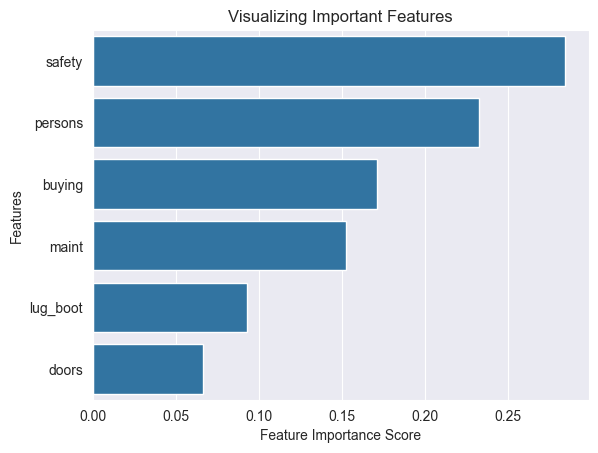

In [103]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

## Build the Random Forest model on selected features


Now, I will drop the least important feature `doors` from the model, rebuild the model and check its effect on accuracy.

In [104]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [105]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


Now, I will build the random forest model and check accuracy.

In [106]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [107]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.9306


## Hyperparameter tuning

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=100, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 100 folds for each of 108 candidates, totalling 10800 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.9439560439560439


## Classification Report

In [109]:
# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         acc       0.94      0.81      0.87        83
        good       0.43      0.82      0.56        11
       unacc       0.98      1.00      0.99       235
       vgood       0.80      0.71      0.75        17

    accuracy                           0.93       346
   macro avg       0.79      0.83      0.79       346
weighted avg       0.94      0.93      0.93       346



## Confusion matrix

In [110]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)




Confusion matrix

 [[ 67   9   5   2]
 [  1   9   0   1]
 [  1   0 234   0]
 [  2   3   0  12]]


In [111]:
import joblib
from sklearn.metrics import accuracy_score  # Ensure this is imported for accuracy calculation

# Save the model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(rfc, model_filename)
print(f"Model saved as {model_filename}")

# Load the model from the file
loaded_model = joblib.load(model_filename)
print("Model loaded successfully")

Model saved as random_forest_model.pkl
Model loaded successfully
